In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPool1D, Dropout, Activation

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras

np.random.seed(42)

# load data

In [9]:
df_ori = pd.read_csv('BBB_planB_weekly.csv')

In [10]:
df = df_ori.copy()
pd.set_option('display.max_columns', None)
df

,T0_Act1,T0_Act2,T0_Act3,T0_Act4,T0_Act5,T0_Act6,T0_Act7,T0_Act9,T0_Act12,T0_Act13,T0_Act14,T0_Act19,T1_Act1,T1_Act2,T1_Act3,T1_Act4,T1_Act5,T1_Act6,T1_Act7,T1_Act9,T1_Act12,T1_Act13,T1_Act14,T1_Act19,T2_Act1,T2_Act2,T2_Act3,T2_Act4,T2_Act5,T2_Act6,T2_Act7,T2_Act9,T2_Act12,T2_Act13,T2_Act14,T2_Act19,T3_Act1,T3_Act2,T3_Act3,T3_Act4,T3_Act5,T3_Act6,T3_Act7,T3_Act9,T3_Act12,T3_Act13,T3_Act14,T3_Act19,T4_Act1,T4_Act2,T4_Act3,T4_Act4,T4_Act5,T4_Act6,T4_Act7,T4_Act9,T4_Act12,T4_Act13,T4_Act14,T4_Act19,T5_Act1,T5_Act2,T5_Act3,T5_Act4,T5_Act5,T5_Act6,T5_Act7,T5_Act9,T5_Act12,T5_Act13,T5_Act14,T5_Act19,T6_Act1,T6_Act2,T6_Act3,T6_Act4,T6_Act5,T6_Act6,T6_Act7,T6_Act9,T6_Act12,T6_Act13,T6_Act14,T6_Act19,T7_Act1,T7_Act2,T7_Act3,T7_Act4,T7_Act5,T7_Act6,T7_Act7,T7_Act9,T7_Act12,T7_Act13,T7_Act14,T7_Act19,T8_Act1,T8_Act2,T8_Act3,T8_Act4,T8_Act5,T8_Act6,T8_Act7,T8_Act9,T8_Act12,T8_Act13,T8_Act14,T8_Act19,T9_Act1,T9_Act2,T9_Act3,T9_Act4,T9_Act5,T9_Act6,T9_Act7,T9_Act9,T9_Act12,T9_Act13,T9_Act14,T9_Act19,T10_Act1,T10_Act2,T10_Act3,T10_Act4,T10_Act5,T10_Act6,T10_Act7,T10_Act9,T10_Act12,T10_Act13,T10_Act14,T10_Act19,T11_Act1,T11_Act2,T11_Act3,T11_Act4,T11_Act5,T11_Act6,T11_Act7,T11_Act9,T11_Act12,T11_Act13,T11_Act14,T11_Act19,T12_Act1,T12_Act2,T12_Act3,T12_Act4,T12_Act5,T12_Act6,T12_Act7,T12_Act9,T12_Act12,T12_Act13,T12_Act14,T12_Act19,T13_Act1,T13_Act2,T13_Act3,T13_Act4,T13_Act5,T13_Act6,T13_Act7,T13_Act9,T13_Act12,T13_Act13,T13_Act14,T13_Act19,T14_Act1,T14_Act2,T14_Act3,T14_Act4,T14_Act5,T14_Act6,T14_Act7,T14_Act9,T14_Act12,T14_Act13,T14_Act14,T14_Act19,T15_Act1,T15_Act2,T15_Act3,T15_Act4,T15_Act5,T15_Act6,T15_Act7,T15_Act9,T15_Act12,T15_Act13,T15_Act14,T15_Act19,T16_Act1,T16_Act2,T16_Act3,T16_Act4,T16_Act5,T16_Act6,T16_Act7,T16_Act9,T16_Act12,T16_Act13,T16_Act14,T16_Act19,T17_Act1,T17_Act2,T17_Act3,T17_Act4,T17_Act5,T17_Act6,T17_Act7,T17_Act9,T17_Act12,T17_Act13,T17_Act14,T17_Act19,T18_Act1,T18_Act2,T18_Act3,T18_Act4,T18_Act5,T18_Act6,T18_Act7,T18_Act9,T18_Act12,T18_Act13,T18_Act14,T18_Act19,T19_Act1,T19_Act2,T19_Act3,T19_Act4,T19_Act5,T19_Act6,T19_Act7,T19_Act9,T19_Act12,T19_Act13,T19_Act14,T19_Act19,T20_Act1,T20_Act2,T20_Act3,T20_Act4,T20_Act5,T20_Act6,T20_Act7,T20_Act9,T20_Act12,T20_Act13,T20_Act14,T20_Act19,T21_Act1,T21_Act12,T21_Act13,T21_Act14,T21_Act19,T21_Act2,T21_Act3,T21_Act4,T21_Act5,T21_Act6,T21_Act7,T21_Act9,T22_Act1,T22_Act12,T22_Act13,T22_Act14,T22_Act19,T22_Act2,T22_Act3,T22_Act4,T22_Act5,T22_Act6,T22_Act7,T22_Act9,T23_Act1,T23_Act12,T23_Act13,T23_Act14,T23_Act19,T23_Act2,T23_Act3,T23_Act4,T23_Act5,T23_Act6,T23_Act7,T23_Act9,T24_Act1,T24_Act12,T24_Act13,T24_Act14,T24_Act19,T24_Act2,T24_Act3,T24_Act4,T24_Act5,T24_Act6,T24_Act7,T24_Act9,T25_Act1,T25_Act12,T25_Act13,T25_Act14,T25_Act19,T25_Act2,T25_Act3,T25_Act4,T25_Act5,T25_Act6,T25_Act7,T25_Act9,T26_Act1,T26_Act12,T26_Act13,T26_Act14,T26_Act19,T26_Act2,T26_Act3,T26_Act4,T26_Act5,T26_Act6,T26_Act7,T26_Act9,T27_Act1,T27_Act12,T27_Act13,T27_Act14,T27_Act19,T27_Act2,T27_Act3,T27_Act4,T27_Act5,T27_Act6,T27_Act7,T27_Act9,T28_Act1,T28_Act12,T28_Act13,T28_Act14,T28_Act19,T28_Act2,T28_Act3,T28_Act4,T28_Act5,T28_Act6,T28_Act7,T28_Act9,T29_Act1,T29_Act12,T29_Act13,T29_Act14,T29_Act19,T29_Act2,T29_Act3,T29_Act4,T29_Act5,T29_Act6,T29_Act7,T29_Act9,T30_Act1,T30_Act12,T30_Act13,T30_Act14,T30_Act19,T30_Act2,T30_Act3,T30_Act4,T30_Act5,T30_Act6,T30_Act7,T30_Act9,T31_Act1,T31_Act12,T31_Act13,T31_Act14,T31_Act19,T31_Act2,T31_Act3,T31_Act4,T31_Act5,T31_Act6,T31_Act7,T31_Act9,T32_Act1,T32_Act12,T32_Act13,T32_Act14,T32_Act19,T32_Act2,T32_Act3,T32_Act4,T32_Act5,T32_Act6,T32_Act7,T32_Act9,T33_Act1,T33_Act12,T33_Act13,T33_Act14,T33_Act19,T33_Act2,T33_Act3,T33_Act4,T33_Act5,T33_Act6,T33_Act7,T33_Act9,T34_Act1,T34_Act12,T34_Act13,T34_Act14,T34_Act19,T34_Act2,T34_Act3,T34_Act4,T34_Act5,T34_Act6,T34_Act7,T34_Act9,T35_Act1,T35_Act12,T35_Act13,T35_Act14,T35_Act19,T35_Act2,T35_Act3,T35_Act4,T35_Act5,T35_Act6,T35_Act7,T35_Act9,T36_Act1,T36_Act12,T36_Act13,T36_Act14,T36_Act19,T36_Act2,T36_Act3,T36_Act4,T36_Act5,T3

# prepare X and y

In [11]:
X = df.drop(['final_result','id'], axis=1)
X

,T0_Act1,T0_Act2,T0_Act3,T0_Act4,T0_Act5,T0_Act6,T0_Act7,T0_Act9,T0_Act12,T0_Act13,T0_Act14,T0_Act19,T1_Act1,T1_Act2,T1_Act3,T1_Act4,T1_Act5,T1_Act6,T1_Act7,T1_Act9,T1_Act12,T1_Act13,T1_Act14,T1_Act19,T2_Act1,T2_Act2,T2_Act3,T2_Act4,T2_Act5,T2_Act6,T2_Act7,T2_Act9,T2_Act12,T2_Act13,T2_Act14,T2_Act19,T3_Act1,T3_Act2,T3_Act3,T3_Act4,T3_Act5,T3_Act6,T3_Act7,T3_Act9,T3_Act12,T3_Act13,T3_Act14,T3_Act19,T4_Act1,T4_Act2,T4_Act3,T4_Act4,T4_Act5,T4_Act6,T4_Act7,T4_Act9,T4_Act12,T4_Act13,T4_Act14,T4_Act19,T5_Act1,T5_Act2,T5_Act3,T5_Act4,T5_Act5,T5_Act6,T5_Act7,T5_Act9,T5_Act12,T5_Act13,T5_Act14,T5_Act19,T6_Act1,T6_Act2,T6_Act3,T6_Act4,T6_Act5,T6_Act6,T6_Act7,T6_Act9,T6_Act12,T6_Act13,T6_Act14,T6_Act19,T7_Act1,T7_Act2,T7_Act3,T7_Act4,T7_Act5,T7_Act6,T7_Act7,T7_Act9,T7_Act12,T7_Act13,T7_Act14,T7_Act19,T8_Act1,T8_Act2,T8_Act3,T8_Act4,T8_Act5,T8_Act6,T8_Act7,T8_Act9,T8_Act12,T8_Act13,T8_Act14,T8_Act19,T9_Act1,T9_Act2,T9_Act3,T9_Act4,T9_Act5,T9_Act6,T9_Act7,T9_Act9,T9_Act12,T9_Act13,T9_Act14,T9_Act19,T10_Act1,T10_Act2,T10_Act3,T10_Act4,T10_Act5,T10_Act6,T10_Act7,T10_Act9,T10_Act12,T10_Act13,T10_Act14,T10_Act19,T11_Act1,T11_Act2,T11_Act3,T11_Act4,T11_Act5,T11_Act6,T11_Act7,T11_Act9,T11_Act12,T11_Act13,T11_Act14,T11_Act19,T12_Act1,T12_Act2,T12_Act3,T12_Act4,T12_Act5,T12_Act6,T12_Act7,T12_Act9,T12_Act12,T12_Act13,T12_Act14,T12_Act19,T13_Act1,T13_Act2,T13_Act3,T13_Act4,T13_Act5,T13_Act6,T13_Act7,T13_Act9,T13_Act12,T13_Act13,T13_Act14,T13_Act19,T14_Act1,T14_Act2,T14_Act3,T14_Act4,T14_Act5,T14_Act6,T14_Act7,T14_Act9,T14_Act12,T14_Act13,T14_Act14,T14_Act19,T15_Act1,T15_Act2,T15_Act3,T15_Act4,T15_Act5,T15_Act6,T15_Act7,T15_Act9,T15_Act12,T15_Act13,T15_Act14,T15_Act19,T16_Act1,T16_Act2,T16_Act3,T16_Act4,T16_Act5,T16_Act6,T16_Act7,T16_Act9,T16_Act12,T16_Act13,T16_Act14,T16_Act19,T17_Act1,T17_Act2,T17_Act3,T17_Act4,T17_Act5,T17_Act6,T17_Act7,T17_Act9,T17_Act12,T17_Act13,T17_Act14,T17_Act19,T18_Act1,T18_Act2,T18_Act3,T18_Act4,T18_Act5,T18_Act6,T18_Act7,T18_Act9,T18_Act12,T18_Act13,T18_Act14,T18_Act19,T19_Act1,T19_Act2,T19_Act3,T19_Act4,T19_Act5,T19_Act6,T19_Act7,T19_Act9,T19_Act12,T19_Act13,T19_Act14,T19_Act19,T20_Act1,T20_Act2,T20_Act3,T20_Act4,T20_Act5,T20_Act6,T20_Act7,T20_Act9,T20_Act12,T20_Act13,T20_Act14,T20_Act19,T21_Act1,T21_Act12,T21_Act13,T21_Act14,T21_Act19,T21_Act2,T21_Act3,T21_Act4,T21_Act5,T21_Act6,T21_Act7,T21_Act9,T22_Act1,T22_Act12,T22_Act13,T22_Act14,T22_Act19,T22_Act2,T22_Act3,T22_Act4,T22_Act5,T22_Act6,T22_Act7,T22_Act9,T23_Act1,T23_Act12,T23_Act13,T23_Act14,T23_Act19,T23_Act2,T23_Act3,T23_Act4,T23_Act5,T23_Act6,T23_Act7,T23_Act9,T24_Act1,T24_Act12,T24_Act13,T24_Act14,T24_Act19,T24_Act2,T24_Act3,T24_Act4,T24_Act5,T24_Act6,T24_Act7,T24_Act9,T25_Act1,T25_Act12,T25_Act13,T25_Act14,T25_Act19,T25_Act2,T25_Act3,T25_Act4,T25_Act5,T25_Act6,T25_Act7,T25_Act9,T26_Act1,T26_Act12,T26_Act13,T26_Act14,T26_Act19,T26_Act2,T26_Act3,T26_Act4,T26_Act5,T26_Act6,T26_Act7,T26_Act9,T27_Act1,T27_Act12,T27_Act13,T27_Act14,T27_Act19,T27_Act2,T27_Act3,T27_Act4,T27_Act5,T27_Act6,T27_Act7,T27_Act9,T28_Act1,T28_Act12,T28_Act13,T28_Act14,T28_Act19,T28_Act2,T28_Act3,T28_Act4,T28_Act5,T28_Act6,T28_Act7,T28_Act9,T29_Act1,T29_Act12,T29_Act13,T29_Act14,T29_Act19,T29_Act2,T29_Act3,T29_Act4,T29_Act5,T29_Act6,T29_Act7,T29_Act9,T30_Act1,T30_Act12,T30_Act13,T30_Act14,T30_Act19,T30_Act2,T30_Act3,T30_Act4,T30_Act5,T30_Act6,T30_Act7,T30_Act9,T31_Act1,T31_Act12,T31_Act13,T31_Act14,T31_Act19,T31_Act2,T31_Act3,T31_Act4,T31_Act5,T31_Act6,T31_Act7,T31_Act9,T32_Act1,T32_Act12,T32_Act13,T32_Act14,T32_Act19,T32_Act2,T32_Act3,T32_Act4,T32_Act5,T32_Act6,T32_Act7,T32_Act9,T33_Act1,T33_Act12,T33_Act13,T33_Act14,T33_Act19,T33_Act2,T33_Act3,T33_Act4,T33_Act5,T33_Act6,T33_Act7,T33_Act9,T34_Act1,T34_Act12,T34_Act13,T34_Act14,T34_Act19,T34_Act2,T34_Act3,T34_Act4,T34_Act5,T34_Act6,T34_Act7,T34_Act9,T35_Act1,T35_Act12,T35_Act13,T35_Act14,T35_Act19,T35_Act2,T35_Act3,T35_Act4,T35_Act5,T35_Act6,T35_Act7,T35_Act9,T36_Act1,T36_Act12,T36_Act13,T36_Act14,T36_Act19,T36_Act2,T36_Act3,T36_Act4,T36_Act5,T3

In [12]:
y = df['final_result']
y

0       0
1       1
2       0
3       1
4       1
       ..
5336    1
5337    1
5338    1
5339    0
5340    1
Name: final_result, Length: 5341, dtype: int64

In [13]:
# convert to numpy array
X = X.values
y = y.values

In [14]:
type(X)

numpy.ndarray

In [15]:
type(y)

numpy.ndarray

# 7:3

In [17]:
X_train1, X_test1, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=42, stratify=y)

In [19]:
print(X_train1.shape)
print(X_test1.shape)
print(y_train.shape)
print(y_test.shape)

(3738, 480)
(1603, 480)
(3738,)
(1603,)


# MinMaxScaler

In [20]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train1)
X_test = min_max_scaler.fit_transform(X_test1)

# reshape

In [21]:
# reshape into correct dimensions to input into cnn
X_train = X_train.reshape(3738,480,1)
X_test = X_test.reshape(1603,480,1)

# build CNN model

In [23]:
np.random.seed(42)
tf.random.set_seed(42)

In [24]:
X_train.shape[1:]

(480, 1)

In [25]:
batch_size = 128

In [46]:
##

lr=0.0001
epochs = 400

model = Sequential()
model.add(Conv1D(filters=64,kernel_size=3, strides=2, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

## loss: 0.4140 - accuracy: 0.8709 (lr=0.0001, epochs = 400)

model = Sequential()
model.add(Conv1D(filters=64,kernel_size=3, strides=2, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

## loss: 0.4088 - accuracy: 0.8765 (lr=0.0001, epochs = 300) --> best

model = Sequential()
model.add(Conv1D(filters=64,kernel_size=3, strides=2, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

## loss: 0.4035 - accuracy: 0.8740 (lr=0.0001, epochs = 200)

model = Sequential()
model.add(Conv1D(filters=64,kernel_size=3, strides=2, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

## loss: 0.4060 - accuracy: 0.8734 (lr=0.0001, epochs = 100)

model = Sequential()
model.add(Conv1D(filters=64,kernel_size=3, strides=2, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

## loss: 0.4505 - accuracy: 0.8621 (lr=0.001, epochs = 100)

model = Sequential()
model.add(Conv1D(filters=64,kernel_size=3, strides=2, input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPool1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=lr),
              metrics=['accuracy'])

In [47]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 239, 64)           256       
                                                                 
 activation_4 (Activation)   (None, 239, 64)           0         
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 119, 64)          0         
 1D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 119, 64)           0         
                                                                 
 flatten_4 (Flatten)         (None, 7616)              0         
                                                                 
 dense_4 (Dense)             (None, 1)                 7617      
                                                      

# fit CNN model

In [48]:
history_model = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/400
30/30 [==============================] - 1s 16ms/step - loss: 0.6804 - accuracy: 0.6758 - val_loss: 0.6602 - val_accuracy: 0.7024
Epoch 2/400
30/30 [==============================] - 0s 13ms/step - loss: 0.6456 - accuracy: 0.7025 - val_loss: 0.6165 - val_accuracy: 0.7024
Epoch 3/400
30/30 [==============================] - 0s 13ms/step - loss: 0.6046 - accuracy: 0.7025 - val_loss: 0.5812 - val_accuracy: 0.7024
Epoch 4/400
30/30 [==============================] - 0s 13ms/step - loss: 0.5826 - accuracy: 0.7025 - val_loss: 0.5720 - val_accuracy: 0.7024
Epoch 5/400
30/30 [==============================] - 0s 13ms/step - loss: 0.5769 - accuracy: 0.7025 - val_loss: 0.5682 - val_accuracy: 0.7024
Epoch 6/400
30/30 [==============================] - 0s 13ms/step - loss: 0.5729 - accuracy: 0.7025 - val_loss: 0.5639 - val_accuracy: 0.7024
Epoch 7/400
30/30 [==============================] - 0s 13ms/step - loss: 0.5692 - accuracy: 0.7025 - val_loss: 0.5594 - val_accuracy: 0.7024
Epoch 

30/30 [==============================] - 0s 12ms/step - loss: 0.4274 - accuracy: 0.8598 - val_loss: 0.4218 - val_accuracy: 0.8559
Epoch 59/400
30/30 [==============================] - 0s 12ms/step - loss: 0.4262 - accuracy: 0.8590 - val_loss: 0.4209 - val_accuracy: 0.8571
Epoch 60/400
30/30 [==============================] - 0s 12ms/step - loss: 0.4253 - accuracy: 0.8612 - val_loss: 0.4199 - val_accuracy: 0.8584
Epoch 61/400
30/30 [==============================] - 0s 13ms/step - loss: 0.4242 - accuracy: 0.8612 - val_loss: 0.4193 - val_accuracy: 0.8596
Epoch 62/400
30/30 [==============================] - 0s 12ms/step - loss: 0.4235 - accuracy: 0.8633 - val_loss: 0.4188 - val_accuracy: 0.8609
Epoch 63/400
30/30 [==============================] - 0s 13ms/step - loss: 0.4224 - accuracy: 0.8644 - val_loss: 0.4179 - val_accuracy: 0.8628
Epoch 64/400
30/30 [==============================] - 0s 13ms/step - loss: 0.4214 - accuracy: 0.8668 - val_loss: 0.4171 - val_accuracy: 0.8634
Epoch 65/400

30/30 [==============================] - 0s 13ms/step - loss: 0.3974 - accuracy: 0.8761 - val_loss: 0.4057 - val_accuracy: 0.8759
Epoch 116/400
30/30 [==============================] - 0s 13ms/step - loss: 0.3971 - accuracy: 0.8756 - val_loss: 0.4053 - val_accuracy: 0.8771
Epoch 117/400
30/30 [==============================] - 0s 13ms/step - loss: 0.3969 - accuracy: 0.8767 - val_loss: 0.4047 - val_accuracy: 0.8784
Epoch 118/400
30/30 [==============================] - 0s 13ms/step - loss: 0.3966 - accuracy: 0.8756 - val_loss: 0.4048 - val_accuracy: 0.8784
Epoch 119/400
30/30 [==============================] - 0s 13ms/step - loss: 0.3956 - accuracy: 0.8764 - val_loss: 0.4048 - val_accuracy: 0.8784
Epoch 120/400
30/30 [==============================] - 0s 13ms/step - loss: 0.3967 - accuracy: 0.8753 - val_loss: 0.4047 - val_accuracy: 0.8777
Epoch 121/400
30/30 [==============================] - 0s 14ms/step - loss: 0.3953 - accuracy: 0.8775 - val_loss: 0.4048 - val_accuracy: 0.8777
Epoch 

Epoch 172/400
30/30 [==============================] - 0s 13ms/step - loss: 0.3841 - accuracy: 0.8793 - val_loss: 0.4066 - val_accuracy: 0.8784
Epoch 173/400
30/30 [==============================] - 0s 13ms/step - loss: 0.3834 - accuracy: 0.8807 - val_loss: 0.4065 - val_accuracy: 0.8790
Epoch 174/400
30/30 [==============================] - 0s 13ms/step - loss: 0.3844 - accuracy: 0.8791 - val_loss: 0.4064 - val_accuracy: 0.8796
Epoch 175/400
30/30 [==============================] - 0s 13ms/step - loss: 0.3842 - accuracy: 0.8793 - val_loss: 0.4063 - val_accuracy: 0.8790
Epoch 176/400
30/30 [==============================] - 0s 13ms/step - loss: 0.3838 - accuracy: 0.8793 - val_loss: 0.4064 - val_accuracy: 0.8790
Epoch 177/400
30/30 [==============================] - 0s 13ms/step - loss: 0.3837 - accuracy: 0.8807 - val_loss: 0.4063 - val_accuracy: 0.8802
Epoch 178/400
30/30 [==============================] - 0s 13ms/step - loss: 0.3833 - accuracy: 0.8799 - val_loss: 0.4065 - val_accuracy:

Epoch 229/400
30/30 [==============================] - 0s 13ms/step - loss: 0.3741 - accuracy: 0.8799 - val_loss: 0.4081 - val_accuracy: 0.8771
Epoch 230/400
30/30 [==============================] - 0s 13ms/step - loss: 0.3745 - accuracy: 0.8807 - val_loss: 0.4083 - val_accuracy: 0.8771
Epoch 231/400
30/30 [==============================] - 0s 13ms/step - loss: 0.3748 - accuracy: 0.8807 - val_loss: 0.4082 - val_accuracy: 0.8790
Epoch 232/400
30/30 [==============================] - 0s 13ms/step - loss: 0.3746 - accuracy: 0.8793 - val_loss: 0.4080 - val_accuracy: 0.8784
Epoch 233/400
30/30 [==============================] - 0s 13ms/step - loss: 0.3738 - accuracy: 0.8807 - val_loss: 0.4079 - val_accuracy: 0.8790
Epoch 234/400
30/30 [==============================] - 0s 13ms/step - loss: 0.3740 - accuracy: 0.8810 - val_loss: 0.4080 - val_accuracy: 0.8784
Epoch 235/400
30/30 [==============================] - 0s 13ms/step - loss: 0.3740 - accuracy: 0.8791 - val_loss: 0.4081 - val_accuracy:

Epoch 286/400
30/30 [==============================] - 0s 14ms/step - loss: 0.3628 - accuracy: 0.8721 - val_loss: 0.4073 - val_accuracy: 0.8746
Epoch 287/400
30/30 [==============================] - 0s 14ms/step - loss: 0.3618 - accuracy: 0.8740 - val_loss: 0.4086 - val_accuracy: 0.8727
Epoch 288/400
30/30 [==============================] - 0s 13ms/step - loss: 0.3622 - accuracy: 0.8767 - val_loss: 0.4073 - val_accuracy: 0.8746
Epoch 289/400
30/30 [==============================] - 0s 14ms/step - loss: 0.3621 - accuracy: 0.8735 - val_loss: 0.4074 - val_accuracy: 0.8740
Epoch 290/400
30/30 [==============================] - 0s 13ms/step - loss: 0.3620 - accuracy: 0.8751 - val_loss: 0.4078 - val_accuracy: 0.8740
Epoch 291/400
30/30 [==============================] - 0s 13ms/step - loss: 0.3611 - accuracy: 0.8732 - val_loss: 0.4080 - val_accuracy: 0.8734
Epoch 292/400
30/30 [==============================] - 0s 14ms/step - loss: 0.3607 - accuracy: 0.8732 - val_loss: 0.4080 - val_accuracy:

30/30 [==============================] - 1s 18ms/step - loss: 0.3546 - accuracy: 0.8737 - val_loss: 0.4111 - val_accuracy: 0.8702
Epoch 343/400
30/30 [==============================] - 1s 18ms/step - loss: 0.3546 - accuracy: 0.8791 - val_loss: 0.4116 - val_accuracy: 0.8709
Epoch 344/400
30/30 [==============================] - 1s 18ms/step - loss: 0.3547 - accuracy: 0.8753 - val_loss: 0.4111 - val_accuracy: 0.8709
Epoch 345/400
30/30 [==============================] - 1s 18ms/step - loss: 0.3551 - accuracy: 0.8756 - val_loss: 0.4106 - val_accuracy: 0.8702
Epoch 346/400
30/30 [==============================] - 1s 18ms/step - loss: 0.3548 - accuracy: 0.8751 - val_loss: 0.4118 - val_accuracy: 0.8702
Epoch 347/400
30/30 [==============================] - 1s 18ms/step - loss: 0.3553 - accuracy: 0.8759 - val_loss: 0.4113 - val_accuracy: 0.8709
Epoch 348/400
30/30 [==============================] - 1s 18ms/step - loss: 0.3547 - accuracy: 0.8777 - val_loss: 0.4114 - val_accuracy: 0.8709
Epoch 

Epoch 399/400
30/30 [==============================] - 0s 13ms/step - loss: 0.3499 - accuracy: 0.8759 - val_loss: 0.4149 - val_accuracy: 0.8709
Epoch 400/400
30/30 [==============================] - 0s 13ms/step - loss: 0.3487 - accuracy: 0.8804 - val_loss: 0.4140 - val_accuracy: 0.8709


In [49]:
model.evaluate(X_test, y_test)

51/51 [==============================] - 0s 977us/step - loss: 0.4140 - accuracy: 0.8709


[0.41398605704307556, 0.870867133140564]

# plot CNN learning process

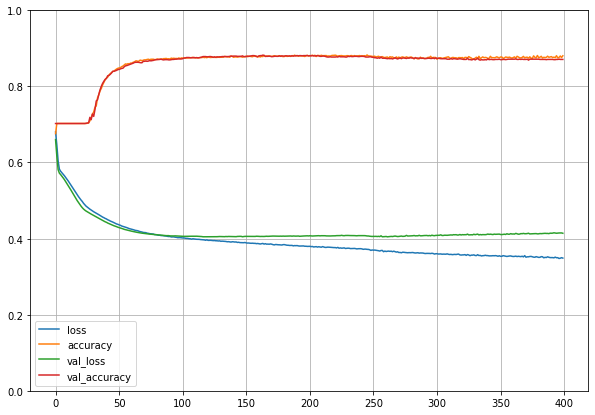

In [50]:
import pandas as pd

pd.DataFrame(history_model.history).plot(figsize=(10, 7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()